In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Read Data and Create a Data Frame

In [2]:
url = '/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'# use relative path
df = pd.read_csv(url)
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.tail(5)

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

# Understand Data

In [4]:
df.info() # check entrie number, entrie index, conlum number, data type, and missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum() # check missing values for each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Fill Missing Data

In [6]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean()) # fill missing values with mean value
df.isnull().sum() # check missing values for each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df['reviews_per_month'].head() # 2 is filled with mean value

0    0.210000
1    0.380000
2    1.373221
3    4.640000
4    0.100000
Name: reviews_per_month, dtype: float64

# Drop Duplicate Data

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Drop Specified Columns

In [9]:
df.drop(['name','host_name','last_review','id','host_id'], axis=1, inplace=True) # drop columns that are not useful for analysis

In [10]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Check Correlation

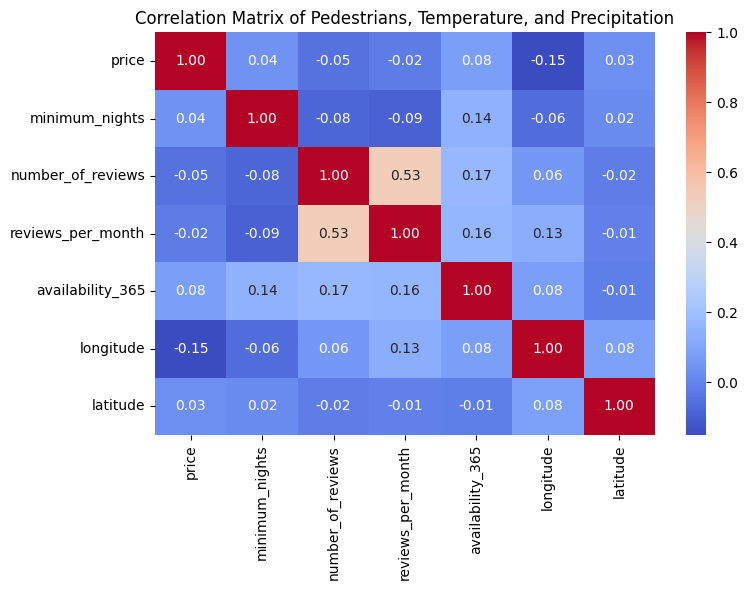

In [11]:
# Creating a correlation matrix
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','availability_365','longitude','latitude']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.tight_layout()
plt.show()

In [12]:
# Drop either "reviews_per_month" or "number_of_reviews" column because of the high correlation
df.drop(['number_of_reviews'], axis=1, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Validating expectations

In [13]:
df.describe() # check the basic statistics of the data

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean            1.373221                        7.143982        112.781327  
std             1.497775                       32.952519        131.622289  
min             0.010000                        1.000000          0.000000  
25%             0.280000                        1.000000          0.000000  
50%             1.220000                        1.000000         45.000000  
75%             1.580000                        2.000000        227.000000  
max            58.500000                      327.000000        365.000000

# Problem statement

**Goal**

Build a Machine Learning Model to Predict Airbnb Price
- Price

**Feature Selection Hypothesis**

- neighbourhood_group               
- neighbourhood                                 
- room_type                                                 
- minimum_nights                                   
- reviews_per_month                   
- availability_365    
- logitude
- latitude

# Data Visualization

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

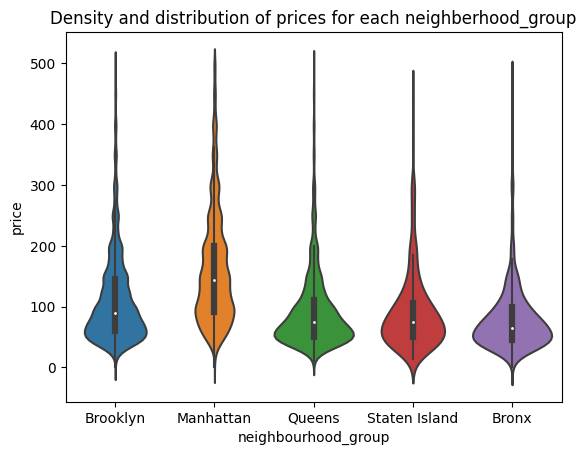

In [14]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

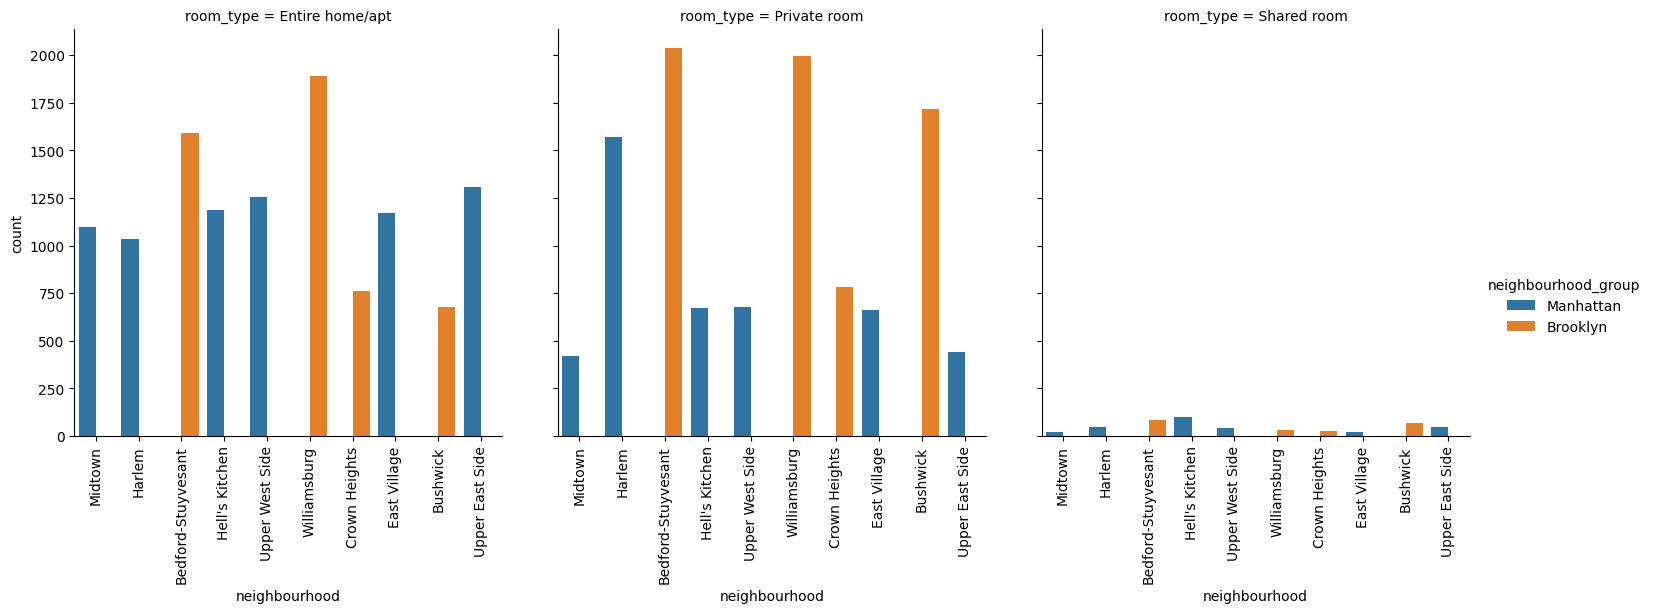

In [15]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

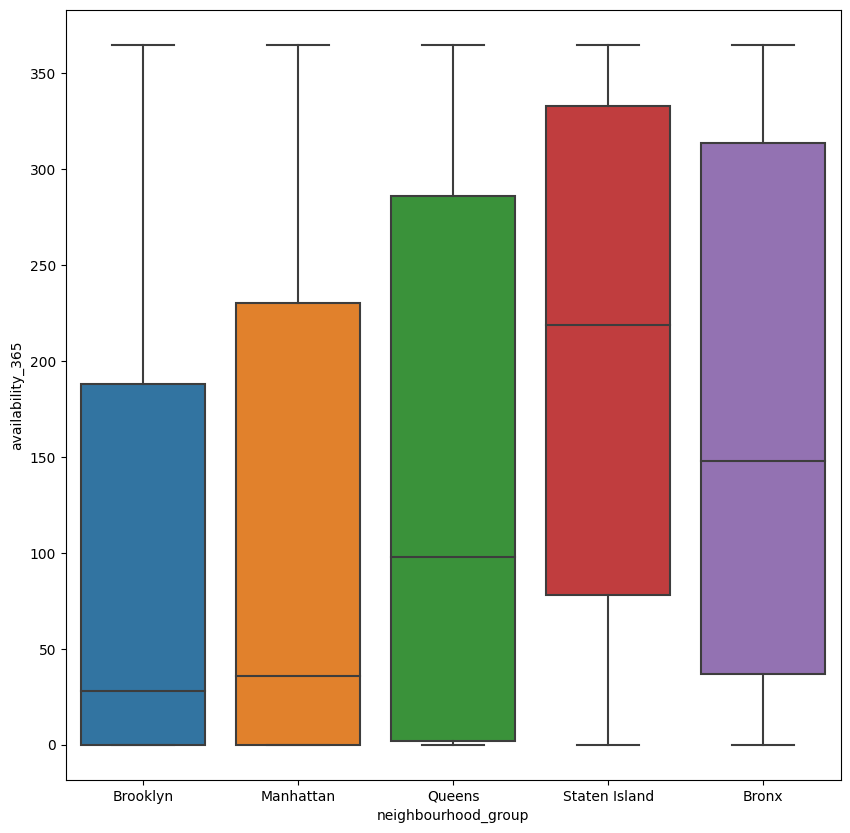

In [16]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

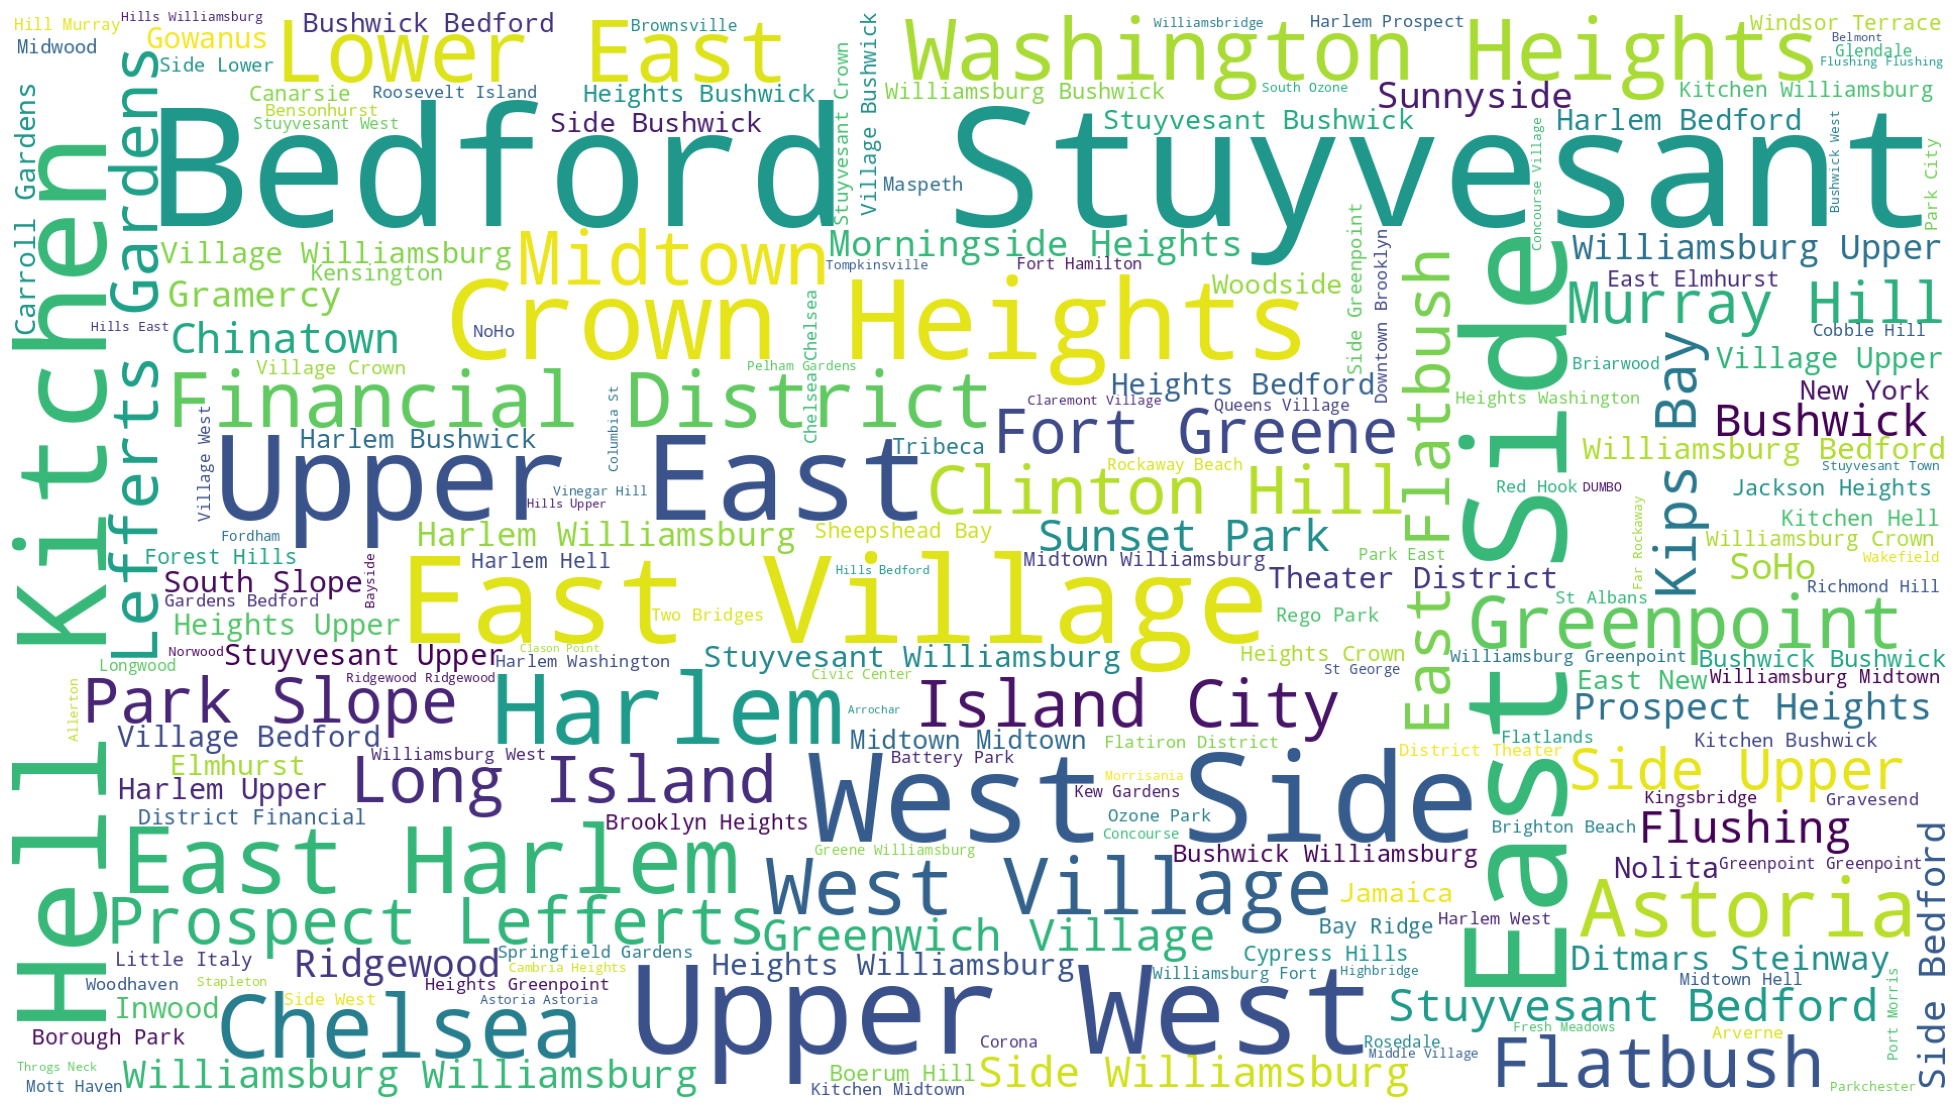

In [17]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

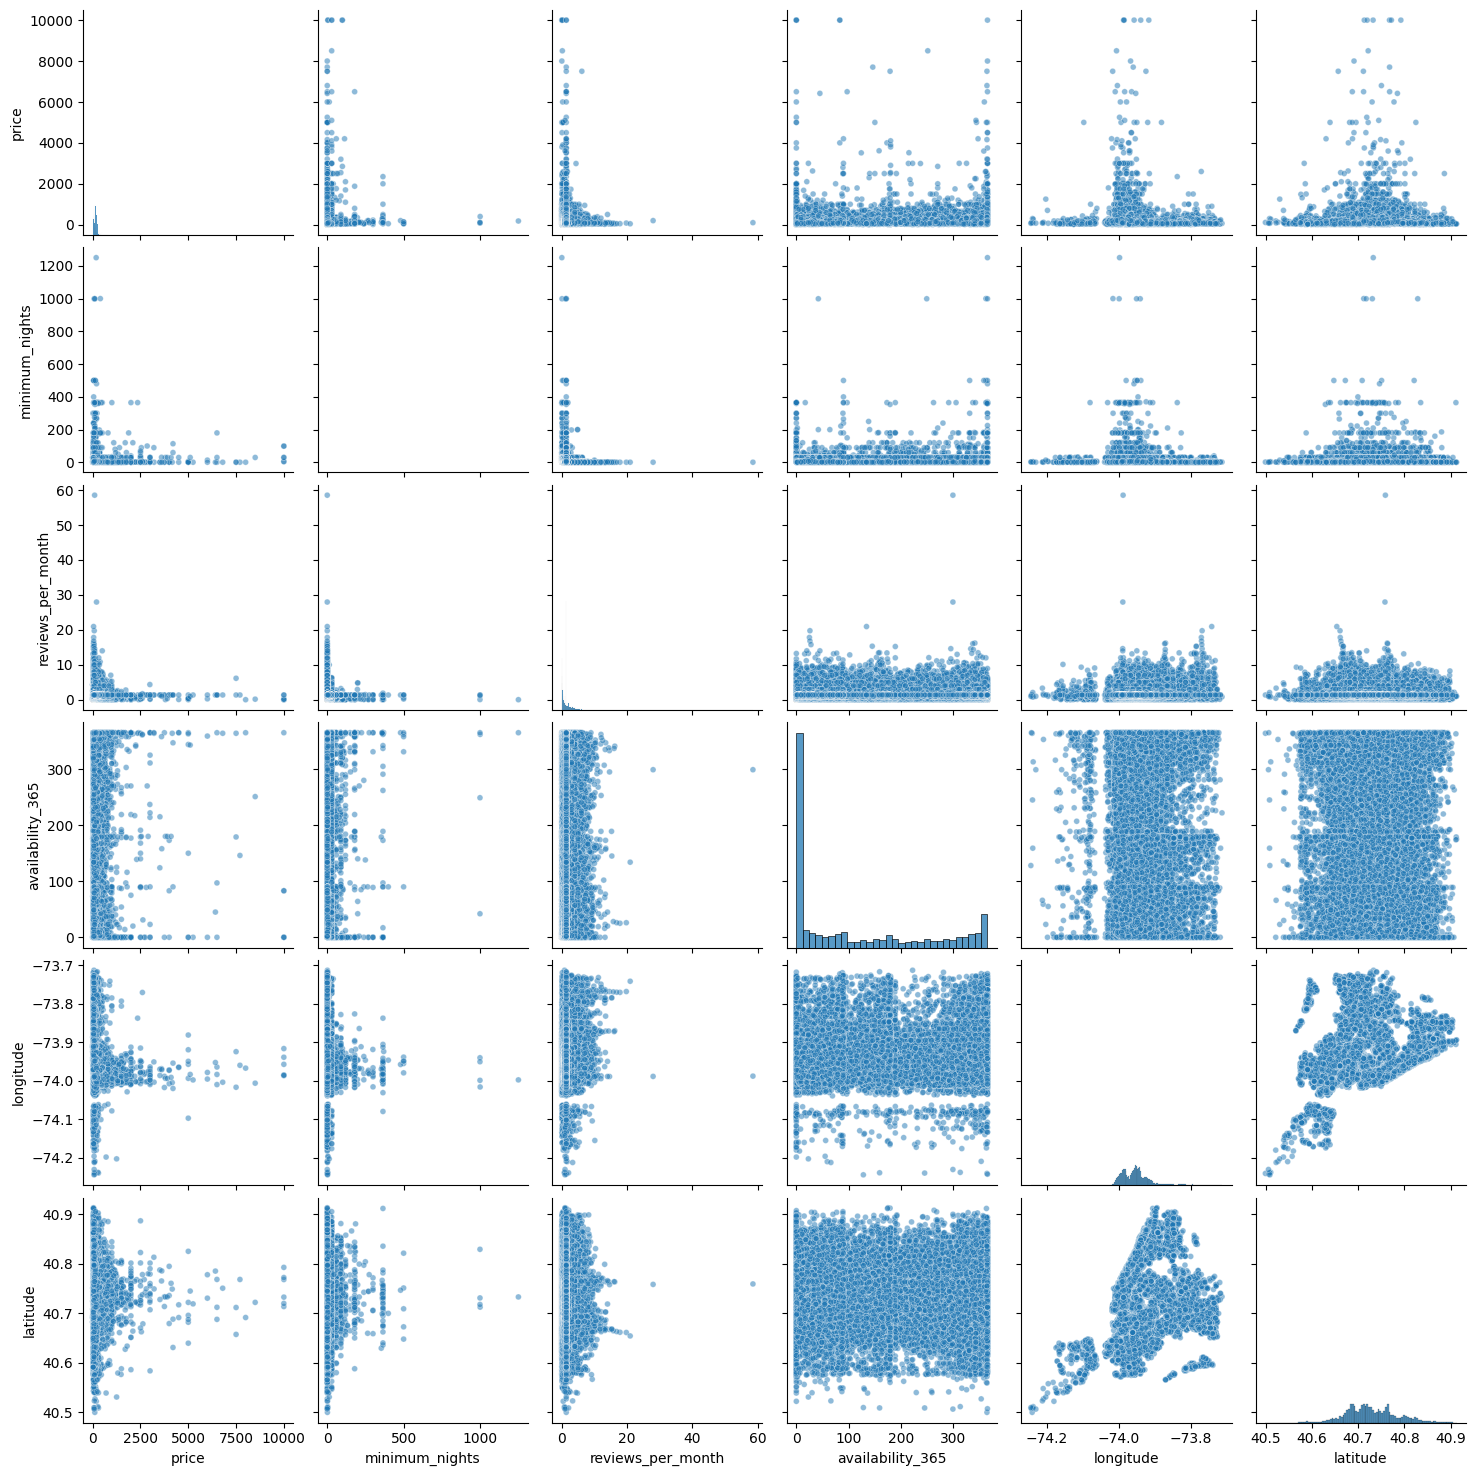

In [18]:
sns.pairplot(df, vars=['price', 'minimum_nights','reviews_per_month','availability_365','longitude','latitude'], plot_kws={'alpha':0.5, 'size': 0.1})# Sractch a pairplot to visualize the data


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

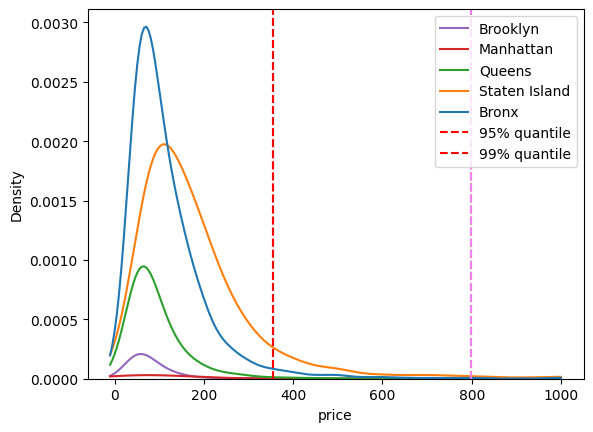

In [19]:
dis_legend = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx', '95% quantile', '99% quantile']

#Plot the density map of price by neighbourhood_group
sns.kdeplot(df, x='price', hue='neighbourhood_group', clip=(-10, 1000))

# Calculate the 95% quantile
q95 = np.quantile(df['price'], 0.95)
plt.axvline(q95, color='red', linestyle='--')
# Draw a vertical line at the 95% quantile
plt.axvline(q95, color='red', linestyle='--', label=f'95% Quantile: {q95:.2f}')

# Calculate the 99% quantile
q99 = np.quantile(df['price'], 0.99)
plt.axvline(q99, color='red', linestyle='--')
# Draw a vertical line at the 99% quantile
plt.axvline(q99, color='violet', linestyle='--', label=f'95% Quantile: {q99:.2f}')
plt.legend(dis_legend, loc='upper right')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

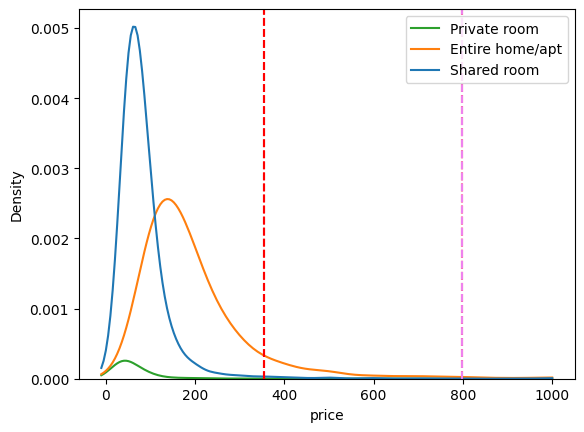

In [20]:
type_lengend = ['Private room','Entire home/apt','Shared room']
#
sns.kdeplot(df,x = 'price', hue = 'room_type', clip = (-10,1000))
# Calculate the 95% quantile
q95 = np.quantile(df['price'], 0.95)
plt.axvline(q95, color='red', linestyle='--')
# Draw a vertical line at the 95% quantile
plt.axvline(q95, color='red', linestyle='--', label=f'95% Quantile: {q95:.2f}')

# Calculate the 99% quantile
q99 = np.quantile(df['price'], 0.99)
plt.axvline(q99, color='red', linestyle='--')
# Draw a vertical line at the 99% quantile
plt.axvline(q99, color='violet', linestyle='--', label=f'95% Quantile: {q99:.2f}')
plt.legend(type_lengend, loc='upper right')

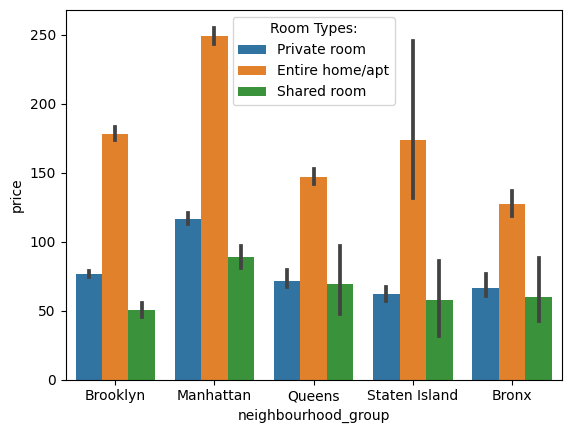

In [21]:
sns.barplot(df,
            x='neighbourhood_group',
            y='price',
            hue='room_type')

plt.legend(title='Room Types:')

<Axes: xlabel='longitude', ylabel='latitude'>

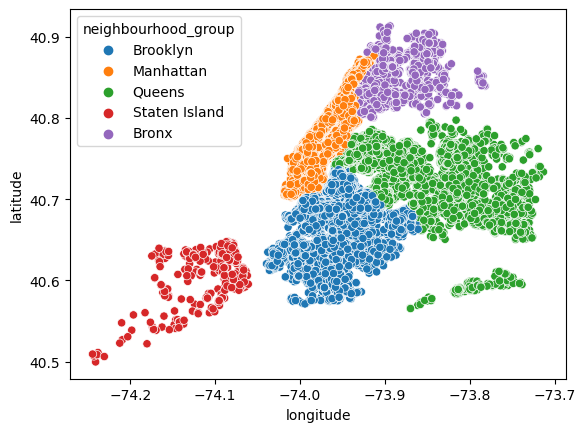

In [22]:
sns.scatterplot(df,
                x='longitude',
                y='latitude',
                hue='neighbourhood_group')

## Feature Engineering

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
df.head(10)

neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn          Kensington  40.64749  -73.97237   
1           Manhattan             Midtown  40.75362  -73.98377   
2           Manhattan              Harlem  40.80902  -73.94190   
3            Brooklyn        Clinton Hill  40.68514  -73.95976   
4           Manhattan         East Harlem  40.79851  -73.94399   
5           Manhattan         Murray Hill  40.74767  -73.97500   
6            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8           Manhattan     Upper West Side  40.80178  -73.96723   
9           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  reviews_per_month  \
0     Private room    149               1           0.210000   
1  Entire home/apt    225               1           0.380000   
2     Private room    150               3           1.373221   
3  Entire home/apt     89               1           4.640000   
4  Entire home/apt     80              10           0.100000   
5  Entire home/apt    200               3           0.590000   
6     Private room     60              45           0.400000   
7     Private room     79               2           3.470000   
8     Private room     79               2           0.990000   
9  Entire home/apt    150               1           1.330000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0  
5                               1               129  
6                               1                 0  
7                               1               220  
8                               1                 0  
9                               4               188

In [25]:
categorical_columns = ['neighbourhood_group','room_type']

# OneHotEncoded these categorical columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Apply the encoder to the columns
encoded_df = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_df.columns = onehot_encoder.get_feature_names_out(categorical_columns)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
categorical_columns_drop = ['neighbourhood_group','neighbourhood','room_type']

df_featureed = df.drop(columns=categorical_columns_drop)
df_featureed = pd.concat([df_featureed, encoded_df], axis=1)

df_featureed.head()

latitude  longitude  price  minimum_nights  reviews_per_month  \
0  40.64749  -73.97237    149               1           0.210000   
1  40.75362  -73.98377    225               1           0.380000   
2  40.80902  -73.94190    150               3           1.373221   
3  40.68514  -73.95976     89               1           4.640000   
4  40.79851  -73.94399     80              10           0.100000   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   
4                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            1.0   
3                           1.0                            0.0   
4                           0.0                            1.0   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   room_type_Private room  room_type_Shared room  
0                     1.0                    0.0  
1                     0.0                    0.0  
2                     1.0                    0.0  
3                     0.0                    0.0  
4                     0.0                    0.0

In [27]:
df_featureed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   price                              48895 non-null  int64  
 3   minimum_nights                     48895 non-null  int64  
 4   reviews_per_month                  48895 non-null  float64
 5   calculated_host_listings_count     48895 non-null  int64  
 6   availability_365                   48895 non-null  int64  
 7   neighbourhood_group_Brooklyn       48895 non-null  float64
 8   neighbourhood_group_Manhattan      48895 non-null  float64
 9   neighbourhood_group_Queens         48895 non-null  float64
 10  neighbourhood_group_Staten Island  48895 non-null  float64
 11  room_type_Private room             48895 non-null  flo

In [28]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

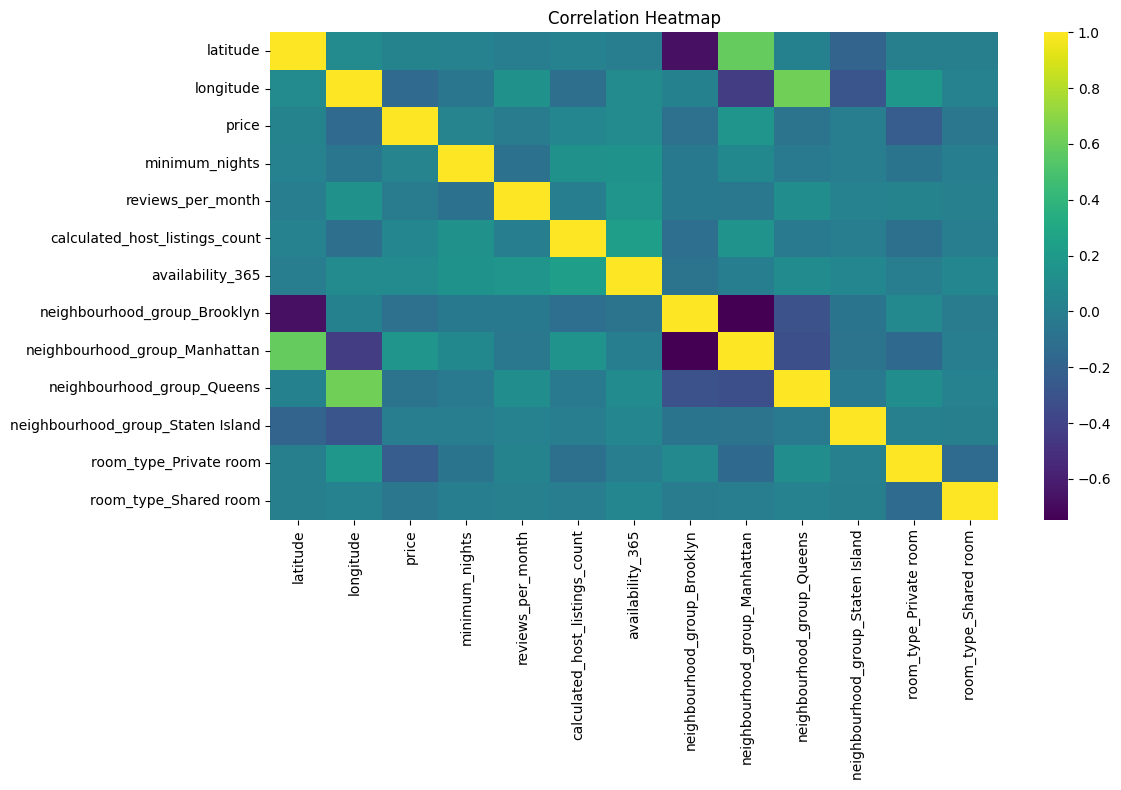

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_featureed.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Feature Engineering (Optional)

In [30]:
categorical_columns_1 = ['neighbourhood_group','neighbourhood','room_type']

# OneHotEncoded these categorical columns
onehot_encoder_1 = OneHotEncoder(sparse=False, drop='first')

# Apply the encoder to the columns
encoded_df_1 = pd.DataFrame(onehot_encoder_1.fit_transform(df[categorical_columns_1]))
encoded_df_1.columns = onehot_encoder_1.get_feature_names_out(categorical_columns_1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
categorical_columns_drop_1 = ['neighbourhood_group','neighbourhood','room_type']

df_featureed_1 = df.drop(columns=categorical_columns_drop_1)
df_featureed_1 = pd.concat([df_featureed_1, encoded_df_1], axis=1)

In [32]:
# Correlation Heatmap
plt.figure(figsize=(120, 80))
sns.heatmap(df_featureed_1.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Data Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_featureed.drop('price', axis=1)
y = df_featureed['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [36]:
split_shapes = {
    "Train X size": X_train.shape,
    "Train y size": y_train.shape,
    "Test X size": X_test.shape,
    "Test y size": y_test.shape
}

split_shapes

{'Train X size': (39116, 12),
 'Train y size': (39116,),
 'Test X size': (9779, 12),
 'Test y size': (9779,)}

## Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = linear_model.predict(X_test)

In [40]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
mse

57797.8896797108

In [42]:
r2

0.09459020838998322

## Hypothesis Testing

In [43]:
import statsmodels.api as sm

In [44]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     429.6
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:33:36   Log-Likelihood:            -3.3493e+05
No. Observations:               48895   AIC:                         6.699e+05
Df Residuals:                   48882   BIC:                         6.700e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.853e+04   3221.957     -8.854      0.000   -3.48e+04   -2.22e+04
latitude                           -212.1908     31.433     -6.751      0.000    -273.800    -150.582
longitude                          -505.2144     36.172    -13.967      0.000    -576.112    -434.317
minimum_nights                        0.0091      0.052      0.176      0.860      -0.092       0.110
reviews_per_month                    -2.5315      0.711     -3.562      0.000      -3.924      -1.139
calculated_host_listings_count       -0.1336      0.033     -4.035      0.000      -0.198      -0.069
availability_365                      0.1771      0.008     21.137      0.000       0.161       0.193
neighbourhood_group_Brooklyn        -35.6464      8.786     -4.057      0.000     -52.868     -18.425
neighbourhood_group_Manhattan        27.1921      7.965      3.414      0.001      11.580      42.804
neighbourhood_group_Queens           -5.6311      8.458     -0.666      0.506     -22.210      10.948
neighbourhood_group_Staten Island  -155.0457     16.725     -9.270      0.000    -187.827    -122.265
room_type_Private room             -105.6916      2.164    -48.841      0.000    -109.933    -101.450
room_type_Shared room              -139.0628      6.888    -20.190      0.000    -152.563    -125.563
==============================================================================
Omnibus:                   110313.023   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        987451113.843
Skew:                          21.417   Prob(JB):                         0.00
Kurtosis:                     697.876   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## New Modeling

In [46]:
#drop_columns = ['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']

X = df_featureed_1.drop('price', axis=1)
y = df_featureed_1['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
split_shapes = {
    "Train X size": X_train.shape,
    "Train y size": y_train.shape,
    "Test X size": X_test.shape,
    "Test y size": y_test.shape
}

split_shapes

{'Train X size': (39116, 232),
 'Train y size': (39116,),
 'Test X size': (9779, 232),
 'Test y size': (9779,)}

In [49]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [50]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
mse

4.085048124957008e+17

In [52]:
r2

-6399269232890.343

In [53]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     27.65
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:33:41   Log-Likelihood:            -3.3441e+05
No. Observations:               48895   AIC:                         6.693e+05
Df Residuals:                   48666   BIC:                         6.713e+05
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -5.874e+04   1.32e+04     -4.434      0.000   -8.47e+04   -3.28e+04
latitude                                     3.9313    186.014      0.021      0.983    -360.658     368.521
longitude                                 -794.7704    141.882     -5.602      0.000   -1072.862    -516.679
minimum_nights                              -0.0299      0.051     -0.581      0.562      -0.131       0.071
reviews_per_month                           -2.0828      0.718     -2.900      0.004      -3.490      -0.675
calculated_host_listings_count              -0.1836      0.036     -5.052      0.000      -0.255      -0.112
availability_365                             0.1778      0.008     21.081      0.000       0.161       0.194
neighbourhood_group_Brooklyn               -45.0255     53.370     -0.844      0.399    -149.631      59.580
neighbourhood_group_Manhattan               17.4455     42.499      0.410      0.681     -65.853     100.744
neighbourhood_group_Queens                  49.2396     46.367      1.062      0.288     -41.641     140.120
neighbourhood_group_Staten Island         -176.8898     71.969     -2.458      0.014    -317.949     -35.830
neighbourhood_Arden Heights               -124.9741    112.881     -1.107      0.268    -346.222      96.274
neighbourhood_Arrochar                       6.9505     52.265      0.133      0.894     -95.489     109.390
neighbourhood_Arverne                       58.9020     34.130      1.726      0.084      -7.993     125.797
neighbourhood_Astoria                      -62.5504     20.776     -3.011      0.003    -103.272     -21.829
neighbourhood_Bath Beach                   -86.5540     55.227     -1.567      0.117    -194.799      21.691
neighbourhood_Battery Park City            119.8110     28.435      4.214      0.000      64.079     175.543
neighbourhood_Bay Ridge                    -37.2804     21.706     -1.718      0.086     -79.825       5.264
neighbourhood_Bay Terrace                   46.6040     92.162      0.506      0.613    -134.035     227.242
neighbourhood_Bay Terrace, Staten Island   -65.3841    157.877     -0.414      0.679    -374.826     244.058
neighbourhood_Baychester                    -2.8706     92.503     -0.031      0.975    -184.178     178.436
neighbourhood_Bayside                       93.7764     38.334      2.446      0.014      18.640     168.912
neighbourhood_Bayswater                     28.6187     58.207      0.492      0.623     -85.468     142.706
neighbourhood_Bedford-Stuyvesant             5.2472      8.960      0.586      0.558     -12.314      22.809
neighbourhood_Belle Harbor                  14.6112     82.483      0.177      0.859    -147.057     176.279
neighbourhood_Bellerose        

## Extra Modeling

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
#drop_columns = ['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']

X = df_featureed.drop('price', axis=1)
y = df_featureed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

split_shapes = {
    "Train X size": X_train.shape,
    "Train y size": y_train.shape,
    "Test X size": X_test.shape,
    "Test y size": y_test.shape
}

split_shapes

{'Train X size': (34226, 12),
 'Train y size': (34226,),
 'Test X size': (14669, 12),
 'Test y size': (14669,)}

In [57]:
decision_tree_reg = DecisionTreeRegressor(random_state=101)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [58]:
y_pred_tree = decision_tree_reg.predict(X_test)

In [59]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [60]:
mse_tree

105014.76208330493

In [61]:
r2_tree

-0.7166789123687463